In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# import sklearn libraries for MLP, random forest, decision tree, and logistic regression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [2]:
os.chdir('/Users/alisdghnia/Desktop/Research Datasets/')
df_1 = pd.read_csv('dict_regression_pvalue.csv')

In [3]:
term_list = df_1.Term.tolist()

In [4]:
tf_idf = pd.read_csv('tf_idf.csv')

In [5]:
# Only keep columns in tf_idf that are in term_list
tf_idf = tf_idf[term_list]
tf_idf

,angel,sale,dlt,metropolis,spoofing,ecosystem,agreement,fiat,classic,visa,...,bonus,offering,ffering,ito,tolerance,commit,rinciple,programming,saft,payment
0,0.000000,0.000642,0.0,0.0,0.0,0.000000,0.000123,0.000000,0.000000,0.001766,...,0.000142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000405
1,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000656,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000199,0.000000,0.000000,0.0,0.002064
2,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000456,0.000000,0.000000,0.0,0.000066
3,0.000000,0.000603,0.0,0.0,0.0,0.000000,0.000043,0.000000,0.000000,0.000000,...,0.000050,0.000000,0.000000,0.000114,0.000000,0.000000,0.000093,0.000050,0.0,0.001427
4,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,0.000044,0.000975,0.0,0.0,0.0,0.000451,0.000105,0.000110,0.000095,0.000000,...,0.000324,0.000068,0.000067,0.000153,0.000048,0.000100,0.000000,0.000040,0.0,0.000807
1834,0.000037,0.000151,0.0,0.0,0.0,0.000000,0.000029,0.000030,0.000000,0.000000,...,0.000100,0.000168,0.000167,0.000025,0.000000,0.000027,0.000031,0.000000,0.0,0.000166
1835,0.000000,0.000148,0.0,0.0,0.0,0.000000,0.000085,0.000000,0.000058,0.000056,...,0.000049,0.000000,0.000000,0.000075,0.000000,0.000000,0.000000,0.000000,0.0,0.000386
1836,0.000000,0.000301,0.0,0.0,0.0,0.000319,0.000000,0.000000,0.000034,0.000000,...,0.000000,0.000000,0.000000,0.000108,0.000000,0.000000,0.000000,0.000000,0.0,0.000020


In [6]:
success = pd.read_csv('Coin-Price-Match 0-1838 - ALL.csv')
success.drop(columns= 'Unnamed: 0', inplace=True)
success.coin_whitepaper_name = success.coin_whitepaper_name.apply(lambda x: x.replace('.pdf', ''))
success_copy = success.copy()

def ConvertInt(x):
    try:
        if type(x) == str:
            x = x.replace('$','')
            x = x.replace(',','')
            x = x.replace('Nan', '0')
            x = x.replace("- -", '0')
            x = x.strip()
            x = float(x)
    except Exception:
        x = 0

    return x

success_copy.market_cap = success_copy.market_cap.apply(lambda x: ConvertInt(x))
success_copy.market_cap.fillna(value=0, inplace=True)
success_copy.market_cap = pd.to_numeric(success_copy.market_cap)

success_copy.coin_price = success_copy.coin_price.apply(lambda x: ConvertInt(x))
success_copy.coin_price.fillna(value=0, inplace=True)
success_copy.coin_price = pd.to_numeric(success_copy.coin_price)

success_copy.volume = success_copy.volume.apply(lambda x: ConvertInt(x))
success_copy.volume.fillna(value=0, inplace=True)
success_copy.volume = pd.to_numeric(success_copy.volume)



df1 = pd.read_csv('Metadata 1838 Whitepapers.csv')
df1.Name = df1.Name.apply(lambda x: x.replace('.pdf', ''))

meta_tfidf = pd.merge(df1, tf_idf, left_index=True, right_index=True)

meta_tfidf = meta_tfidf[meta_tfidf['Flesch Reading Ease'] > 0]
meta_tfidf = meta_tfidf[meta_tfidf['Flesch Reading Ease'] < 100]
meta_tfidf = meta_tfidf[meta_tfidf['New Dale-Chall'] > 0]
meta_tfidf = meta_tfidf[meta_tfidf['New Dale-Chall'] < 10]

meta_tfidf.reset_index(inplace=True)
meta_tfidf = meta_tfidf.drop(columns=['Unnamed: 0', 'File Size (MB)', 'Number of Pages', 'Word Count', 'Flesch Reading Ease', 'New Dale-Chall', 'Abstract Section',
                                      'Summary Section', 'Reference Section', 'level_0'])
success_copy = success_copy.drop(columns=['coin_name_on_web', 'coin_symbol', 'max_supply', 'total_supply', 'fully_diluted_market_cap'])

all_df = pd.merge(success_copy, meta_tfidf, left_on = 'coin_whitepaper_name', right_on = 'Name')
all_df = all_df.drop(columns='Name')

all_df

,coin_whitepaper_name,coin_price,market_cap,volume,angel,sale,dlt,metropolis,spoofing,ecosystem,...,bonus,offering,ffering,ito,tolerance,commit,rinciple,programming,saft,payment
0,0chain - Whitepaper,0.18,8702623.0,90347.0,0.000052,0.000018,0.000036,0.0,0.0,0.000070,...,0.000000,0.000079,0.000078,0.000018,0.000028,0.000000,0.000000,0.000000,0.0,0.000252
1,0x - Whitepaper,0.17,147120661.0,21811197.0,0.000000,0.000000,0.000000,0.0,0.0,0.000040,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000053,0.0,0.000000
2,0xbitcoin - Whitepaper,0.15,1492573.0,73508.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0xcert - Whitepaper,0.00,0.0,0.0,0.000020,0.000802,0.000000,0.0,0.0,0.000417,...,0.000056,0.000016,0.000016,0.000071,0.000000,0.000031,0.000017,0.000019,0.0,0.000027
4,1inch - Whitepaper,0.50,304470524.0,17445198.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,ZMINE - Whitepaper,0.00,948804.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000244,0.000000,0.0,0.000748
1696,Zoin - Whitepaper,0.04,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000244,0.000000,0.0,0.000748
1697,ZPER - Whitepaper,0.00,15691.0,0.0,0.000000,0.000267,0.000000,0.0,0.0,0.000000,...,0.000000,0.000050,0.000049,0.000224,0.000000,0.000049,0.000000,0.000000,0.0,0.000000
1698,ZrCoin - Whitepaper,0.00,0.0,0.0,0.000000,0.000267,0.000000,0.0,0.0,0.000000,...,0.000000,0.000050,0.000049,0.000224,0.000000,0.000049,0.000000,0.000000,0.0,0.000000


In [7]:
# Median Value for Market Cap
median_market_cap = all_df.market_cap.median()

# binary values for market cap based on median
all_df['market_cap_binary'] = all_df['market_cap'].apply(lambda x: 1 if x > median_market_cap else 0)

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_df[term_list], all_df['market_cap_binary'], test_size=0.2)

Accuracy:  0.6352941176470588
Confusion Matrix:  [[107  61]
 [ 63 109]]
Classification Report:                precision    recall  f1-score   support

           0       0.63      0.64      0.63       168
           1       0.64      0.63      0.64       172

    accuracy                           0.64       340
   macro avg       0.64      0.64      0.64       340
weighted avg       0.64      0.64      0.64       340

AUC: 0.635
Precision Score: 0.641
Accuracy: 0.64 (+/- 0.08)
Precision Score: 0.65 (+/- 0.05)
Accuracy: 0.64 (+/- 0.02)
Precision Score: 0.65 (+/- 0.02)


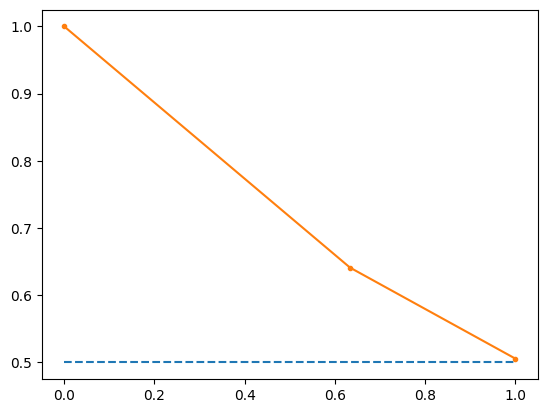

In [10]:
# same process for random forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Confusion Matrix: ", confusion_matrix(y_test, predictions))
print("Classification Report: ", classification_report(y_test, predictions))
fpr, tpr, thresholds = roc_curve(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)
print('Precision Score: %.3f' % precision_score(y_test, predictions))
precision, recall, thresholds = precision_recall_curve(y_test, predictions)

# calculate the standard deviation of the accuracy and precision scores
accuracy_1 = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
precision_1 = cross_val_score(rf, X_train, y_train, cv=10, scoring='precision')
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy_1.mean(), accuracy_1.std() * 2))
print("Precision Score: %0.2f (+/- %0.2f)" % (precision_1.mean(), precision_1.std() * 2))

# run the cross validation (5-fold) for the random forest model 100 times and store the results in a list and then calculate the mean and standard deviation
accuracy_2 = []
precision_2 = []
for i in range(1000):
    accuracy_2.append(cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy').mean())
    precision_2.append(cross_val_score(rf, X_train, y_train, cv=5, scoring='precision').mean())
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(accuracy_2), np.std(accuracy_2) * 2))
print("Precision Score: %0.2f (+/- %0.2f)" % (np.mean(precision_2), np.std(precision_2) * 2))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
# same process for Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Confusion Matrix: ", confusion_matrix(y_test, predictions))
print("Classification Report: ", classification_report(y_test, predictions))
fpr, tpr, thresholds = roc_curve(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)
print('Precision Score: %.3f' % precision_score(y_test, predictions))
precision, recall, thresholds = precision_recall_curve(y_test, predictions)

# calculate the standard deviation of the accuracy and precision scores
accuracy_1 = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')
precision_1 = cross_val_score(dt, X_train, y_train, cv=10, scoring='precision')
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy_1.mean(), accuracy_1.std() * 2))
print("Precision Score: %0.2f (+/- %0.2f)" % (precision_1.mean(), precision_1.std() * 2))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
# same process for logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Confusion Matrix: ", confusion_matrix(y_test, predictions))
print("Classification Report: ", classification_report(y_test, predictions))
fpr, tpr, thresholds = roc_curve(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)
print('Precision Score: %.3f' % precision_score(y_test, predictions))
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
# use MLP to predict market cap
mlp = MLPClassifier(hidden_layer_sizes=(10,10,), max_iter=1000)
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)

# print out important metrics
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Confusion Matrix: ", confusion_matrix(y_test, predictions))
print("Classification Report: ", classification_report(y_test, predictions))

# print out ROC curve, AUC, Precision Score, and Precision-Recall Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)
print('Precision Score: %.3f' % precision_score(y_test, predictions))
precision, recall, thresholds = precision_recall_curve(y_test, predictions)

# calculate the standard deviation of the accuracy and precision scores
accuracy_1 = cross_val_score(mlp, X_train, y_train, cv=10, scoring='accuracy')
precision_1 = cross_val_score(mlp, X_train, y_train, cv=10, scoring='precision')
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy_1.mean(), accuracy_1.std() * 2))
print("Precision Score: %0.2f (+/- %0.2f)" % (precision_1.mean(), precision_1.std() * 2))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()